# Business Problem


### To predict the level of damage (Grade Level- 1, 2, 3)  to buildings caused by the 2015 Gorkha earthquake in Nepal. This is a multiclass classification task. 

# Importing the Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Dataframe containing all the predictor independent variables
data = pd.read_csv("train_values.csv")
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [4]:
#Dataframe containing the target variable
data_y =  pd.read_csv("train_labels.csv")
data_y.drop("building_id", axis=1, inplace=True)
data_y.head()

,damage_grade
0,3
1,2
2,3
3,2
4,3


In [5]:
# Adding the target variable to the main dataframe
data["damage_grade"]=data_y["damage_grade"]
data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


In [6]:
data.describe() #For Numeric Data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
data.describe(include="O") #For Categorical Data

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
count,260601,260601,260601,260601,260601,260601,260601,260601
unique,3,5,3,5,4,4,10,4
top,t,r,n,f,q,s,d,v
freq,216757,219196,182842,209619,165282,202090,250072,250939


### Preliminary Data Analysis
- There are 260601 observations and 39 features with 31 numerical and 8 categorical variables. 
- The building_id feature is a unique value column and must be dropped.

- Despite the info() function showing no missing values, from the describe() function we can see that age has a minimum value of 0 (which is not possible) and thus indicative that there are some missing values. 
- The dataset has 12 binary features with 0 (no) or 1(yes) as the possible values. All the binary features except 	has_superstructure_mud_mortar_stone anre sparse columns with much more 0's than 1's since the mean is less than 0.10 for these features.
- Age feature seems to have few outliers that are skewing the mean value. 
- The categorical columns have letters representing the different labels (obfuscated data) 
- Features like the geo level id are actually categorical varibles represented in a numeric form and need to undergo categorical encoding.

# Domain Analysis

#### geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int):
geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567. These are important features since the location of the building plays an important role in predicting the damage as buildings closer to the epicenter of the earthquake would undergo more damage than those located further away.

#### count_floors_pre_eq (type: int): 
number of floors in the building before the earthquake. Shorter buildings are stiffer than taller ones and thus a three-story building is considered more vulnerable to earthquake damage than a 30-story skyscraper.The taller a structure, the more flexible it is. The more flexible it is, the less energy is required to keep it from toppling or collapsing when the earth's shaking makes it sway. Thus buildings with lesser floors are more susceptible to earthquake damage than those with more floors.  

#### age (type: int):
age of the building in years. Older buildings that have undergone more wear and tear are more susceptible to earthquake damage.   

#### area_percentage (type: int): 
normalized area of the building footprint. 

#### height_percentage (type: int): 
normalized height of the building footprint.

#### land_surface_condition (type: categorical): 
surface condition of the land where the building was built. Possible values: n, o, t. Areas that are prone to natural disasters often have softer ground material which can move and cave during heavy rain or vibrations. Thus the land type where the building was constructed can be useful in predicting the level of earthquake damage. 

#### foundation_type (type: categorical): 
type of foundation used while building. Possible values: h, i, r, u, w. Buildings in earthquake-prone areas  often need to have the structure reinforced which can be done by using damping techniques or creation of trusses. Thus buildings which such strong foundations are more resistant to earthquake damage. 

#### roof_type (type: categorical):
type of roof used while building. Possible values: n, q, x. 

#### ground_floor_type (type: categorical):
type of the ground floor. Possible values: f, m, v, x, z. 

#### other_floor_type (type: categorical):
type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x. 

#### position (type: categorical): 
position of the building. Possible values: j, o, s, t. 

#### plan_configuration (type: categorical): 
building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u. 

#### has_superstructure_adobe_mud (type: binary):
flag variable that indicates if the superstructure was made of Adobe/Mud. 

#### has_superstructure_mud_mortar_stone (type: binary):
flag variable that indicates if the superstructure was made of Mud Mortar Stone. 

#### has_superstructure_stone_flag (type: binary): 
flag variable that indicates if the superstructure was made of Stone.

#### has_superstructure_cement_mortar_stone (type: binary):
flag variable that indicates if the superstructure was made of Cement Mortar - Stone. 

#### has_superstructure_mud_mortar_brick (type: binary):
flag variable that indicates if the superstructure was made of Mud Mortar Brick. 

#### has_superstructure_cement_mortar_brick (type: binary): 
flag variable that indicates if the superstructure was made of Cement Mortar - Brick. 

#### has_superstructure_timber (type: binary):
flag variable that indicates if the superstructure was made of Timber. 

#### has_superstructure_bamboo (type: binary):
flag variable that indicates if the superstructure was made of Bamboo. This material is more resistant to earthquake damage. 

#### has_superstructure_rc_non_engineered (type: binary):
flag variable that indicates if the superstructure was made of non-engineered reinforced concrete. Non egineered buildings are those that are spontaneously and informally constructed in the traditional manner without any or little intervention by the qualified architects and engineers in their design. Such buildings have not been designed to sustain earthquake damage. 

#### has_superstructure_rc_engineered (type: binary): 
flag variable that indicates if the superstructure was made of engineered reinforced concrete. This material is more resistant to earthquake damage.

#### has_superstructure_other (type: binary): 
flag variable that indicates if the superstructure was made of any other material.

#### legal_ownership_status (type: categorical): 
legal ownership status of the land where building was built. Possible values: a, r, v, w. 

#### count_families (type: int): 
number of families that live in the building. 

#### has_secondary_use (type: binary): 
flag variable that indicates if the building was used for any secondary purpose. 

#### has_secondary_use_agriculture (type: binary):
flag variable that indicates if the building was used for agricultural purposes. 

#### has_secondary_use_hotel (type: binary): 
flag variable that indicates if the building was used as a hotel. 

#### has_secondary_use_rental (type: binary):
flag variable that indicates if the building was used for rental purposes. 

#### has_secondary_use_institution (type: binary): 
flag variable that indicates if the building was used as a location of any institution. 

#### has_secondary_use_school (type: binary): 
flag variable that indicates if the building was used as a school. 

#### has_secondary_use_industry (type: binary): 
flag variable that indicates if the building was used for industrial purposes.

#### has_secondary_use_health_post (type: binary):
flag variable that indicates if the building was used as a health post. 

#### has_secondary_use_gov_office (type: binary):
flag variable that indicates if the building was used fas a government office. 

#### has_secondary_use_use_police (type: binary): 
flag variable that indicates if the building was used as a police station.

#### has_secondary_use_other (type: binary):
flag variable that indicates if the building was secondarily used for other purposes. 
 



# Exploratory Data Analysis

## Univariate Analysis

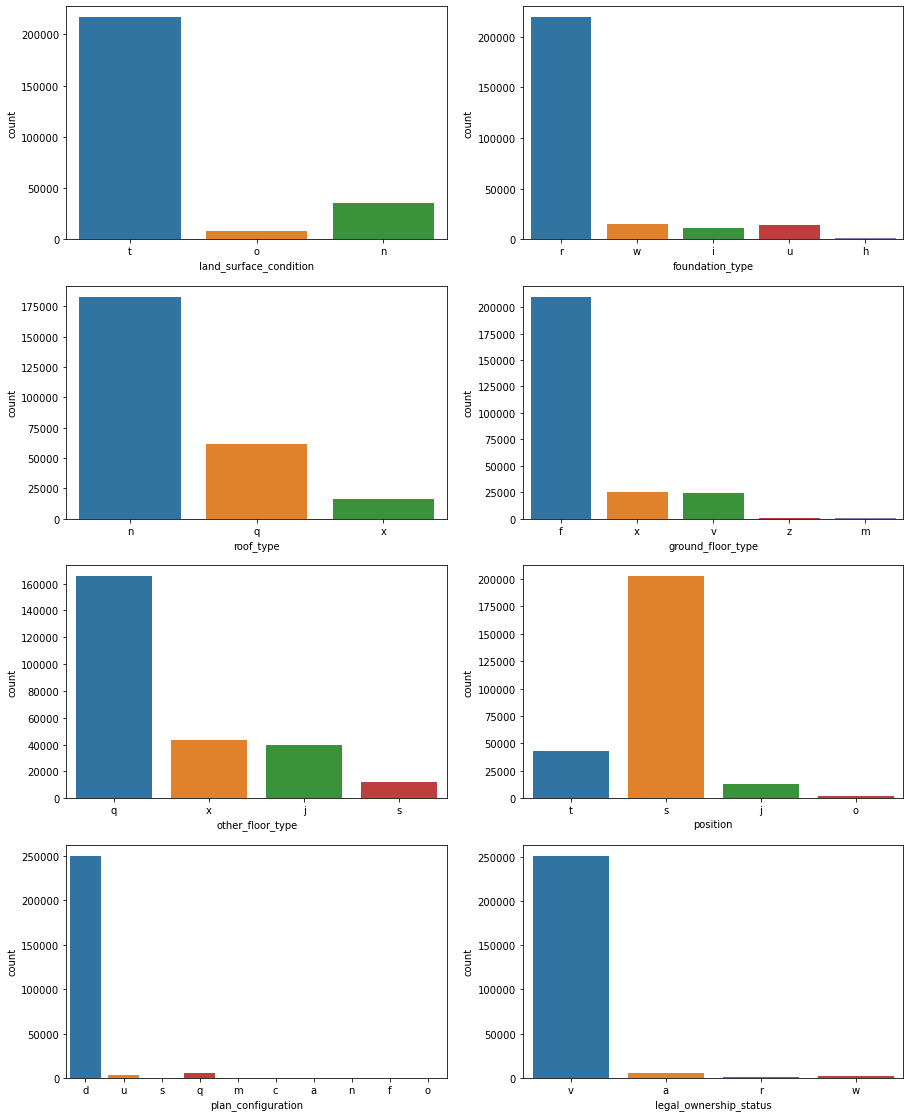

In [8]:
#Categorical Variables
plotnumber = 0
plt.figure(figsize=(15,30))
for column in data.columns:
    if data[column].dtype == "object":
        plotnumber+=1
        ax= plt.subplot(6,2,plotnumber)
        sns.countplot(data= data, x=column)
        

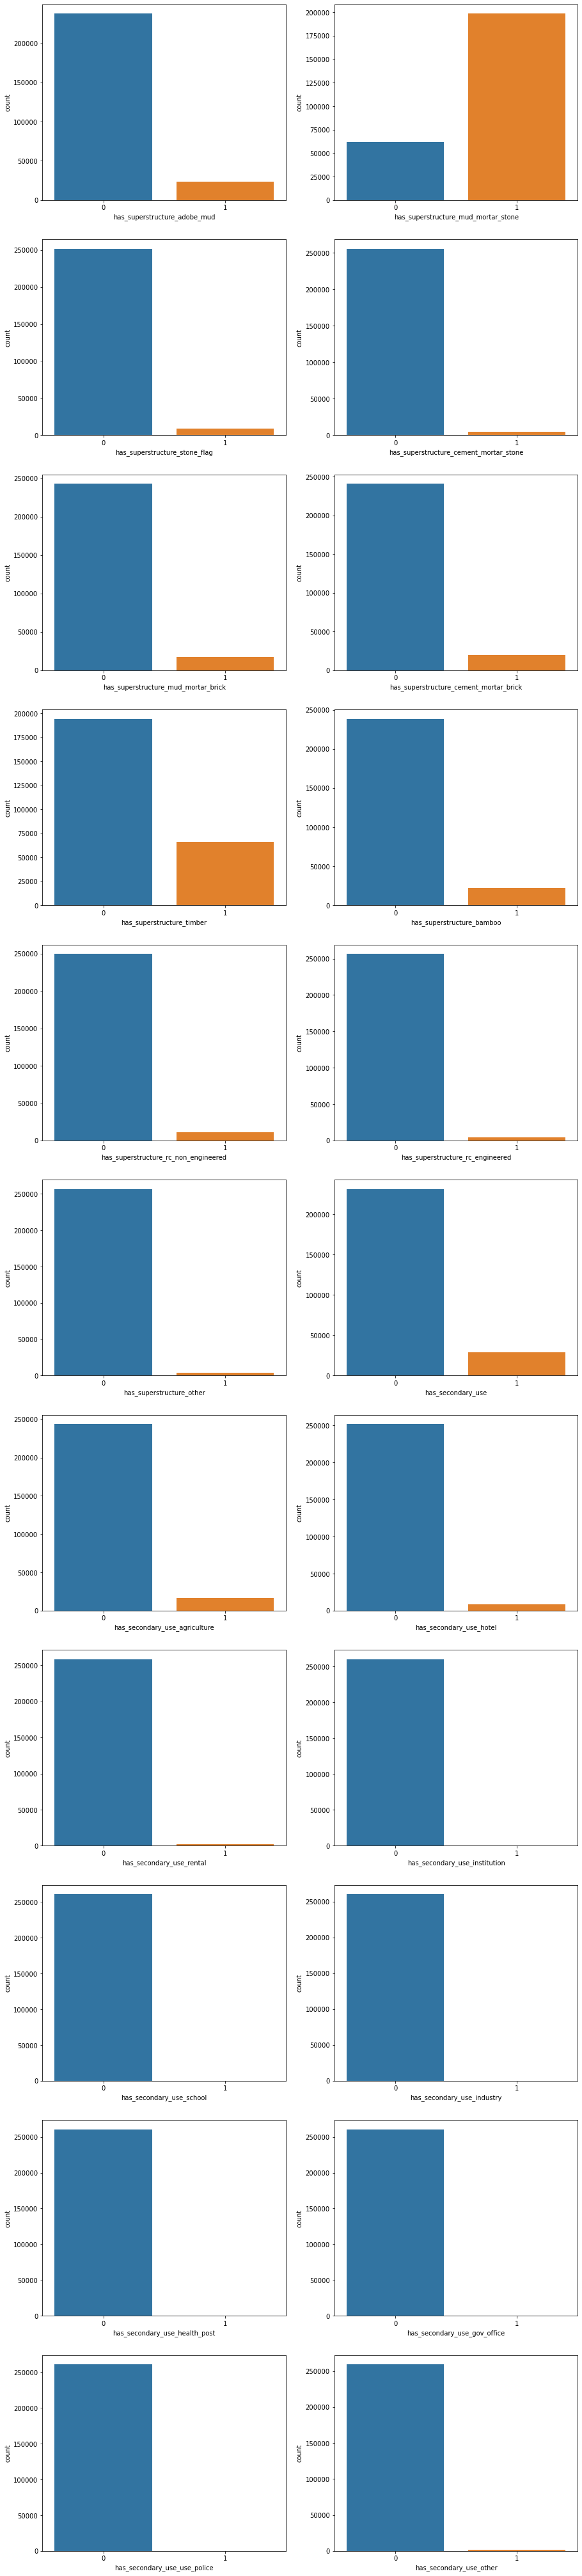

In [9]:
# Plotting Binary features

binary_features=['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other','has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']

plotnumber = 0
plt.figure(figsize=(15,80))
for column in binary_features:
        plotnumber+=1
        ax= plt.subplot(12,2,plotnumber)
        sns.countplot(data= data, x=column)
        

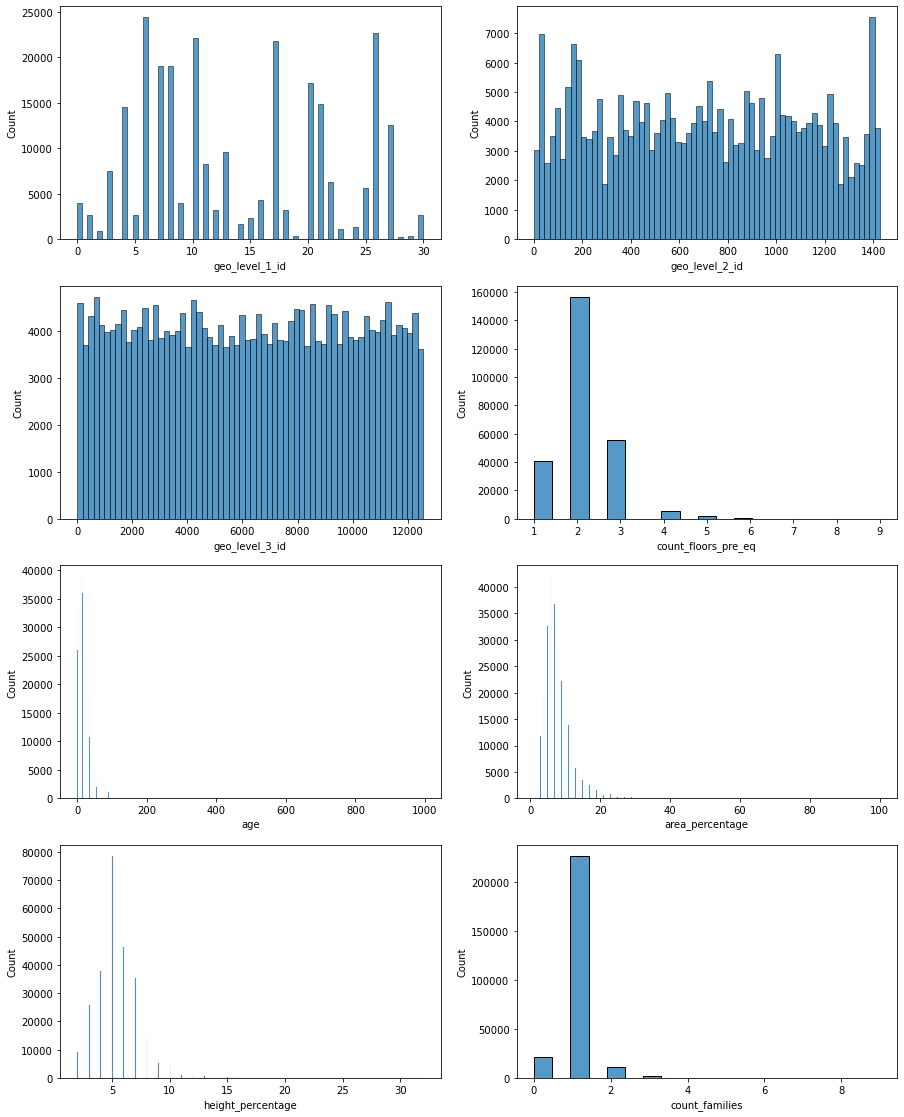

In [10]:
#Numerical Variables

numerical_features =['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage','count_families']
plotnumber = 0
plt.figure(figsize=(15,30))
for column in numerical_features:
        plotnumber+=1
        ax= plt.subplot(6,2,plotnumber)
        sns.histplot(data= data, x=column)

<AxesSubplot:xlabel='damage_grade', ylabel='count'>

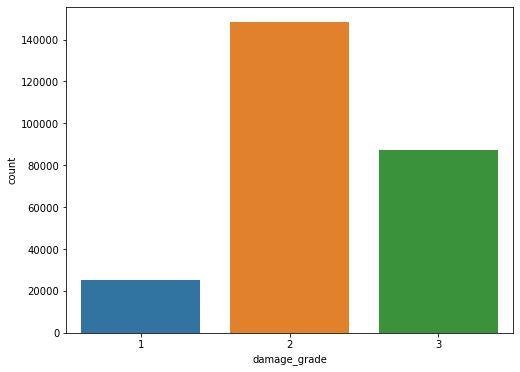

In [11]:
#Plotting Target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data_y, x ="damage_grade" )

### Damage Grade
57% of the observations have a damage grade=2, 33% have a damage_grade=3 and 10% have damage grade= 1. This is an ordinal feature with 1 implying low, 2 implying high and 3 being very high level of damage to buildings. 

In [12]:
# import sweetviz as sv
# sv_report = sv.analyze(data)
# sv_report.show_html()


### Analysis

#### Building id
This is a unique value column and must be dropped from the dataset.

#### Geo_level_1_id
Buildings located in id's 5 to 10 are most frequent.

#### Geo_level_2_id
Building id values for this feature have similar frequency of occurences with a uniform looking distribution. 

#### Geo_level_3_id
This high cardinality feature has a very uniform distribution with most values having a similar frequency of occurance.

#### count_floors_pre_eq
60% of the buildings have 2 floors, 21% of them have 3 floors and 16% have 1 floor. All the buildings have at max 9 floors with less than 3% making up for floors greater than 3. Thus 97% of the buildings had less than 4 floors. 

#### Age
15% of the buildings were 10 years old followed by 14% that were 15 years. The average age of the building is 27 with 75% of the observation falling below 30 years of age. This is a positively skewed distribution caused by a few extreme positive values (age = 995).

#### area_percentage
Area_percentage = 6 is the most frequently occuring value with 8 being the mean.  95% of the observations have values less than 16. This is a positively skewed distribution with extreme values such as area_percentage =100


#### height_percentage
This is a positively skewed distribution with majority of the values (68%) lying between 3 to 7 with an average value of 5.4. 

#### land_surface_condition 
83% of the buildings have a land surface condition of type 't' followed by 'n' with 14% and 'o' with only 3%.

#### foundation_type 
Out of the 5 different foundation types, 'r' type is the most frequently occuring one making up 84% of total observations.

#### roof_type 
70% of the buildings have a roof type of type 'n' followed by 'q' with 24% and 'x' with only 6%.

#### ground_floor_type 
Out of the 5 different floor types, 'f' type is the most frequently occuring one making up 80% of total observations, followed by 'x' 10% and 'v' 9%. 

#### other_floor_type 
Out of the 4 different types, 'q' type is the most frequently occuring one making up 63% of total observations.

#### position 
78% of the buildings have a position of type 's'.

#### plan_configuration
96% have a building plan configuration of type 'd'. 

#### has_superstructure_adobe_mud 
91% of the buildings were not made of Adobe/Mud. This a sparse feature. 

#### has_superstructure_mud_mortar_stone 
76% of the buildings were made of Mud Mortar Stone. 

#### has_superstructure_stone_flag 
97% of the buildings were not made of Stone.This a sparse feature. 

#### has_superstructure_cement_mortar_stone
98% of the buildings were not made of Cement Mortar - Stone. This a sparse feature. 

#### has_superstructure_mud_mortar_brick 
92% of the buildings were not made of Mud Mortar Brick. This a sparse feature. 

#### has_superstructure_cement_mortar_brick
93% of the buildings were not made of Cement Mortar - Brick. This a sparse feature. 

#### has_superstructure_timber 
75% of the buildings were not made of Timber. 

#### has_superstructure_bamboo 
91% of the buildings were not made of Bamboo. This a sparse feature. 

#### has_superstructure_rc_non_engineered 
96% of the buildings were not rc non engineered indicated they were planned buildings. This is a sparse feature.

#### has_superstructure_rc_engineered
98% buildings did not have engineered concrete used. This is a sparse feature.

#### has_superstructure_other 
99% buildings did not have any other material used for construction. This is a sparse feature. 

#### legal_ownership_status (type: categorical): 
96% of the buildings have a legal ownership status of type 'v'. 

#### count_families (type: int): 
87% of the buildings had only 1 family living with less 1% having more than 3. 

#### has_secondary_use 
89% of buildings were not used for any secondary purpose. 

#### has_secondary_use_agriculture 
94% of the buildings were used for agricultural purposes. 

#### has_secondary_use_hotel 
97% of the buildings were not used as a hotel.This is a sparse feature.  

#### has_secondary_use_rental 
99% of the buildings were not used for rental purposes.This is a very sparse feature. 

#### has_secondary_use_institution
99% of the buildings were not used as a location of any institution. This is a very sparse feature. 

#### has_secondary_use_school 
99% of the buildings were not used as a school. This is a very sparse feature.

#### has_secondary_use_industry
99% of the buildings were not used for industrial purposes.This is a very sparse feature.

#### has_secondary_use_health_post 
99% of the buildings were not used as a health post. This is a very sparse feature.

#### has_secondary_use_gov_office 
99% of the buildings were not used as a government office. This is a very sparse feature.

#### has_secondary_use_use_police
99% of the buildings were not used as a police station.This is a very sparse feature.

#### has_secondary_use_other
99% of the buildings were not secondarily used for other purposes.This is a very sparse feature. 
 





## Bivariate Analysis

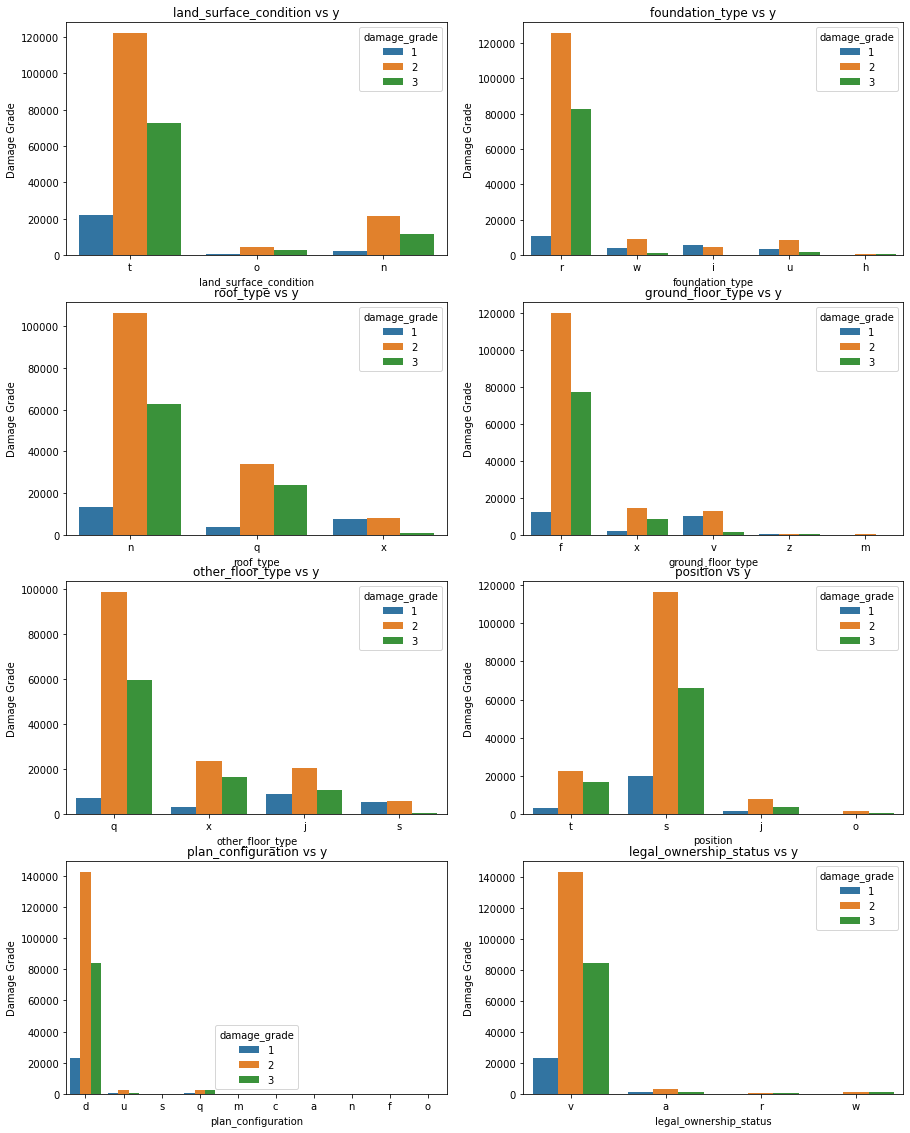

In [13]:
# Categorical data
plt.figure(figsize=(15,30))
plotnumber=0
for column in data.columns:
    if data[column].dtype=="object":
        plotnumber+=1
        ax= plt.subplot(6,2,plotnumber)
        sns.countplot(data=data,x=data[column], hue=data_y.damage_grade)
        plt.title(f"{column} vs y")
        plt.xlabel(f"{column}")
        plt.ylabel("Damage Grade")


## Categorical Features

### land_surface_condition vs y
Land surface conditions seem to cause a damage grade of 2 to most buildings.  The damage grade of type ‘t’ condition is most which could be because this type has a greater number of observations. This various types of land surface conditions don’t seem to show significant differences in proportions of damage grade levels for each type.

### foundation_type vs y
Buildings with foundation type ‘r’ have a damage grade of level 2 followed by 3. This foundation type tends to have higher damage grades as compared to type ‘i’ which has a lower damage grade. The other foundation types too have damage grade of 2 or 1 indicating these foundation types cause lesser building damage.  

### roof_type vs y
Roof type of ‘n’ and ‘q’ seem to cause more damage to buildings (more observations of grade 2 and 3) as compared to type ‘x’ which has lower damage grades (more observations of grade 2 and 1).

### ground_floor_type vs y
Ground floor of type ‘r’ and ‘x’ causes more damage as compared to type ‘v’. All the types have a damage grade of 2 as the most frequently occurring damage grade of the three. 

### other_floor_type vs y
All the other floor types have a damage grade of 2 as the most frequently occurring target variable class followed by grade 3 except for the type ‘s’ which has almost the same number for grade 1 and 2 indicating that this type causes lower damage levels as compare to others. 

### position vs y
Buildings with position type ‘s’ have the highest damage levels however all the types have proportionally similar damage levels.  These various types of positions don’t seem to show significant differences in proportions of damage grade levels for each type. 

### plan_configuration vs y
Buildings with a plan configuration of type ‘d’ have the most damage with level 2 being the most frequently occurring grade in this type. 

### legal_ownership_status vs y
The damage grade is highest for type ‘v’ which is also the most frequently occurring type. 


### 

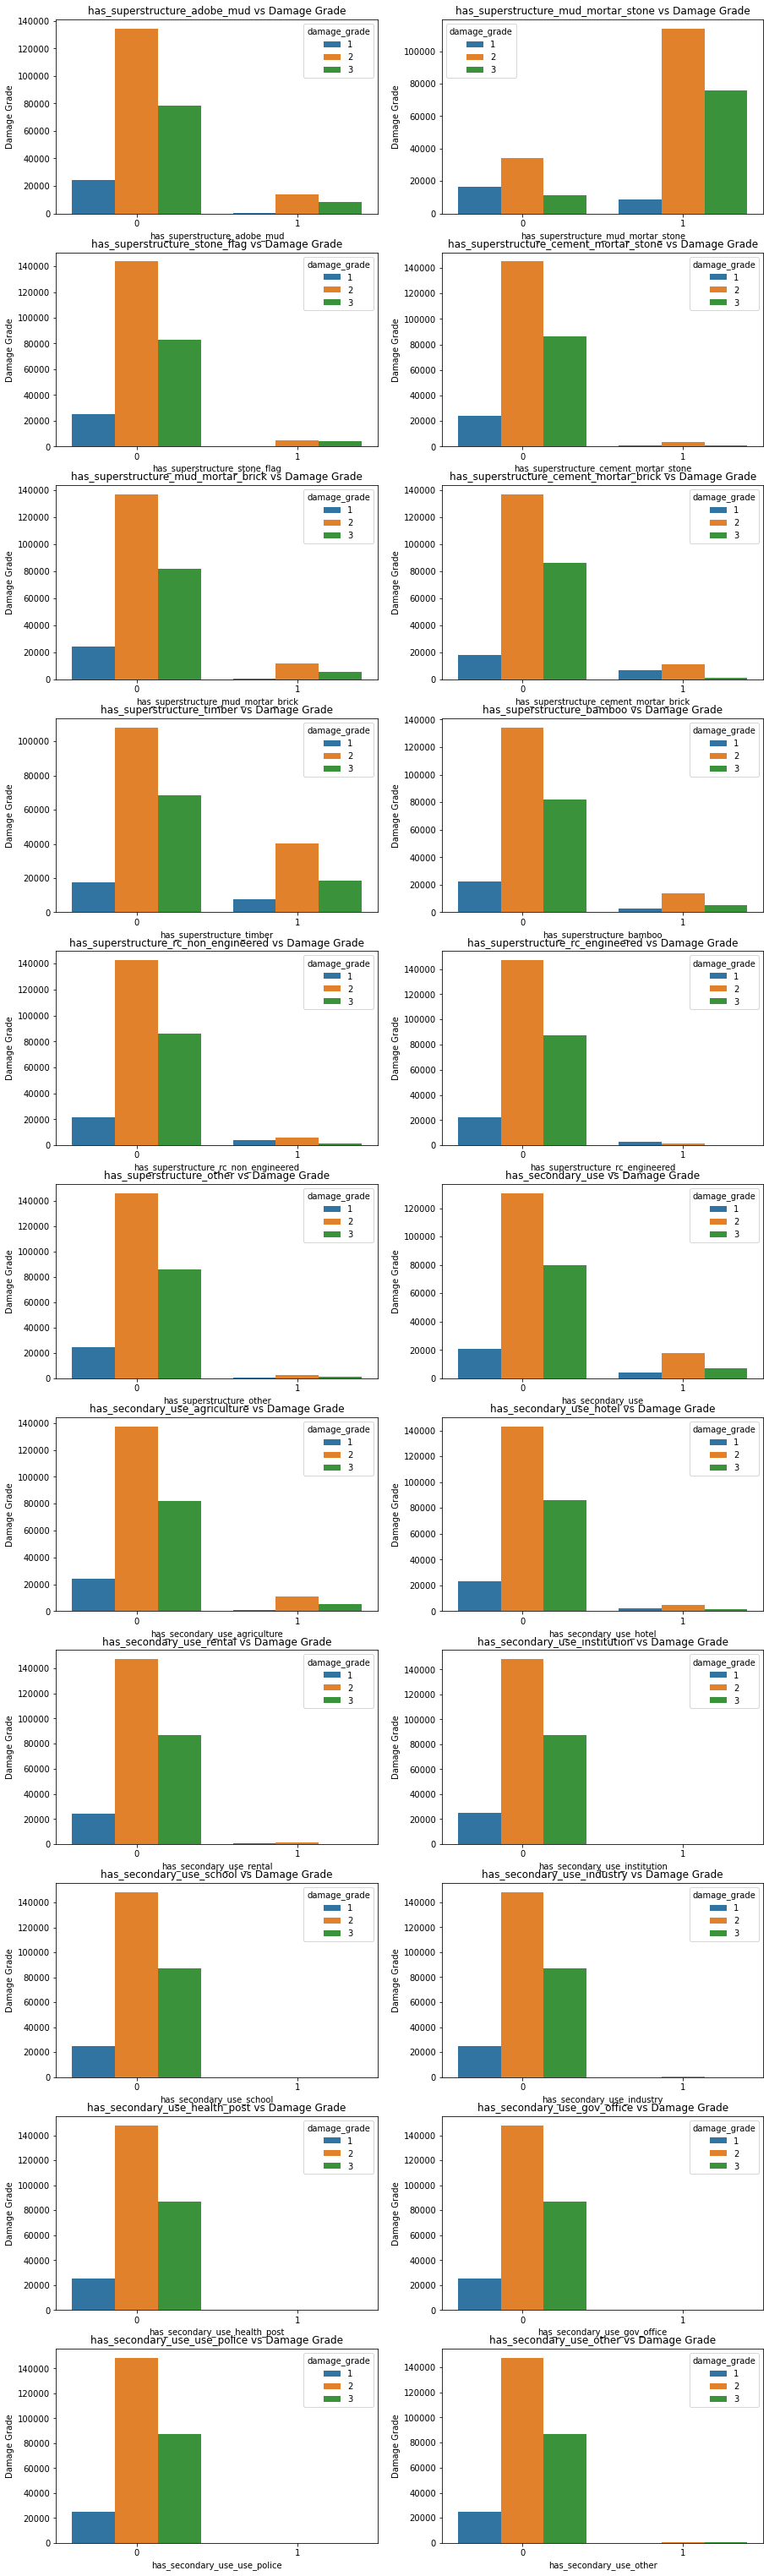

In [14]:
# Binary Features
plt.figure(figsize=(15,60))
plotnumber=0
for column in binary_features:
        plotnumber+=1
        ax= plt.subplot(12,2,plotnumber)
        sns.countplot(data=data,x=data[column], hue=data_y.damage_grade)
        plt.title(f"{column} vs Damage Grade")
        plt.xlabel(f"{column}")
        plt.ylabel("Damage Grade")

## Binary Features

### has_superstructure_mud_mortar_stone vs Damage grade
Buildings that used  mud mortar stone for construction showed  proportionally higher damage grades (grade 2 or 3) as comapred to those that did not use this material. 

### All the other binary features vs y
In general, the other binary features are predimonantly sparse features with more 0's than 1's. A general observation for all these binary features is that for the 0 label , damage grade of level 2 occurs most frequently, followed by grade 3 and finally grade 1. 

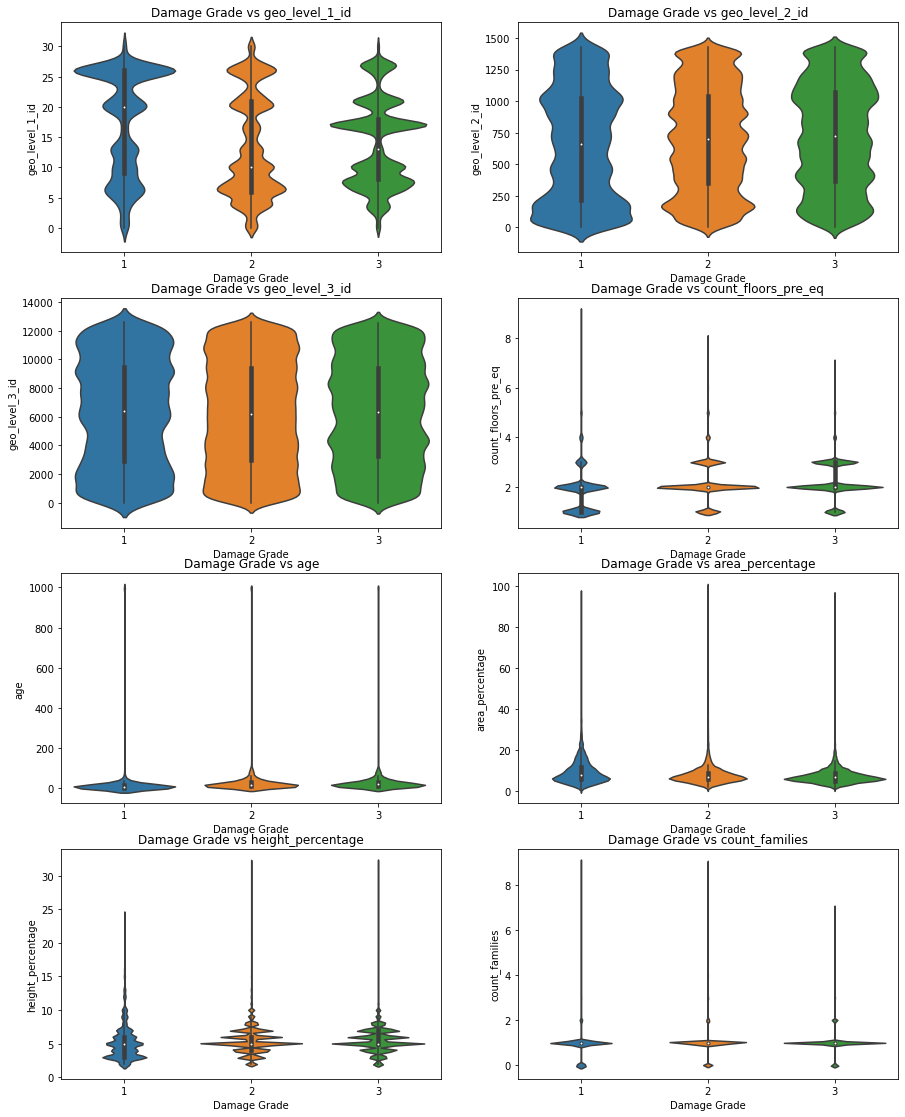

In [15]:
# Numerical Features
plt.figure(figsize=(15,60))
plotnumber=0
for column in numerical_features:
        plotnumber+=1
        ax= plt.subplot(12,2,plotnumber)
        sns.violinplot(data=data,y=data[column], x=data.damage_grade)
        plt.title(f"Damage Grade vs {column}")
        plt.ylabel(f"{column}")
        plt.xlabel("Damage Grade")

## Numerical Features

### Damage_grade vs geo_level_1_id
Builidings lying in geo_level_1_id's between 25 and 28 show least damage as indicated by more observations falling in this range for damage grade 1. Builidings lying in geo_level_1_id's between 0 and 10 show higherdamage as indicated by more observations falling in this range for damage grade 2. Builidings lying in geo_level_1_id's between 15 and 18 show highest damage as indicated by more observations falling in this range for damage grade 3. 

### Damage_grade vs count_floors_pre_eq
Damage grades (1, 2 and 3) are high for buildings with 2 floors. Buildings with 1 floor have lower damages (grade=1) as comapred to buildings with 3 floors that show more observations in damage grade = 3.

### Damage_grade vs height_percentage
Damage levels are higher when height_percentage is 5 or greater as comapred to when height percentage is less than 5 which shows more observations in the damage grade=1 label. 

### Damage_grade vs area_percenatge
Damage grade of all levels show most observations lying at around an area_percentage=8. 

# Data Preprocessing

## Handling Missing Values

In [16]:
data.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

There are no missing values

## Feature Engineering

Certain numerical features have a positively skewed distribution as can be seen from the graphs below. This means that there are some observations with very high values as comapred to the rest of the data. This is a problematic since such skewed data hurts the performance of nearly every prediction model, since it interferes with the loss function of the model.

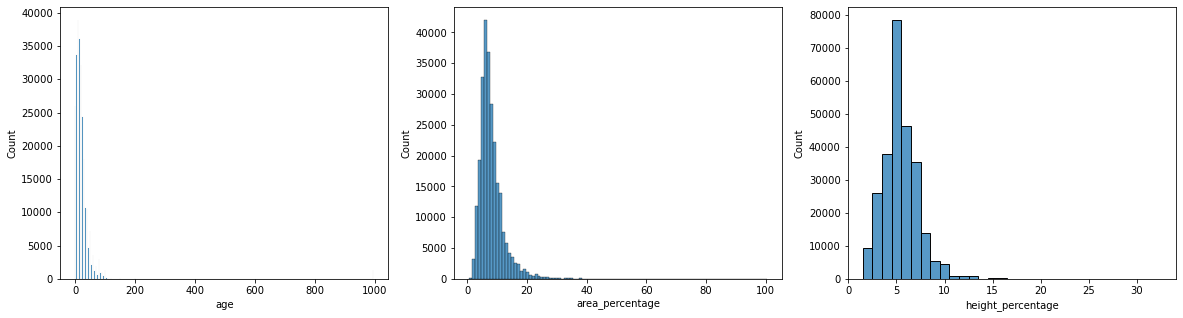

In [17]:
plotnumber=0
plt.figure(figsize=(20,5))
for feature in ["age","area_percentage", "height_percentage"]:
    plotnumber+=1
    ax=plt.subplot(1,3,plotnumber)
    sns.histplot(data[feature], discrete=True)

In order to tackle this excessive rigthward skewness problem, we will take the log of the values of these features so that we can reduce this major disparity in observations without changing the order or meaning of the data.Since the age feature has 0 values and the natural log of 0 does nor exist, we will add 1 to each value and then take the log. 

In [18]:
data.age = data.age.apply(lambda x: np.log(x+1))


In [19]:
data.area_percentage= np.log(data.area_percentage)
data.height_percentage= np.log(data.height_percentage)
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,3.433987,1.791759,1.609438,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,2.397895,2.079442,1.945910,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,2.397895,1.609438,1.609438,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,2.397895,1.791759,1.609438,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,3.433987,2.079442,2.197225,t,r,...,0,0,0,0,0,0,0,0,0,3


As we can see from the graphs below, after log transformation our graphs tend towards a normal distribution and the excessive rightward skew is reduced. 

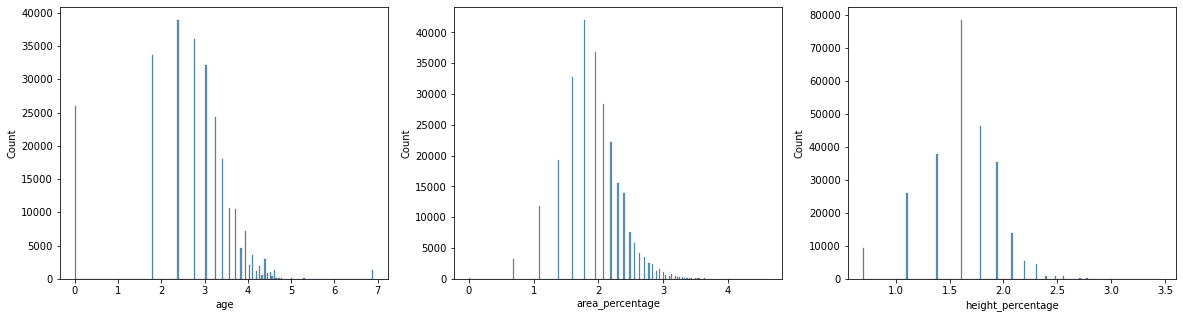

In [20]:
plotnumber=0
plt.figure(figsize=(20,5))
for feature in ["age","area_percentage", "height_percentage"]:
    plotnumber+=1
    ax=plt.subplot(1,3,plotnumber)
    sns.histplot(data[feature])

## Categorical Encoding

We will use One Hot Encoding for the categorical features.

In [21]:
data = pd.get_dummies(data, columns=['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'], drop_first=True)
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,3.433987,1.791759,1.609438,1,1,...,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,2.397895,2.079442,1.945910,0,1,...,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,2.397895,1.609438,1.609438,0,1,...,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,2.397895,1.791759,1.609438,0,1,...,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,3.433987,2.079442,2.197225,1,0,...,0,0,0,0,0,0,0,0,1,0


Despite the 3 geo level id features being in a numeric form, they are actually categorical variables and have to be treated accordingly. The different values in these features are just numeric labels of locations with different specificity. The cardinality of features increase from geo level id 1 to 3 as the specifivity of the building's location increases. For such high cardinality features we will use target encoding which takes the mean of the response variable of each group and assigns all observations in that group that value. 

In [22]:
import category_encoders as ce
encoder = ce.TargetEncoder()
data.geo_level_1_id=data.geo_level_1_id.astype("object")
data.geo_level_1_id = encoder.fit_transform(data.geo_level_1_id, data.damage_grade)


D:\Anaconda\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
D:\Anaconda\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [23]:
data.geo_level_2_id=data.geo_level_2_id.astype("object")
data.geo_level_2_id = encoder.fit_transform(data.geo_level_2_id, data.damage_grade)

data.geo_level_3_id=data.geo_level_3_id.astype("object")
data.geo_level_3_id = encoder.fit_transform(data.geo_level_3_id, data.damage_grade)

## Outliers
Tree based models are robust to outliers

## Feature Selection

<AxesSubplot:>

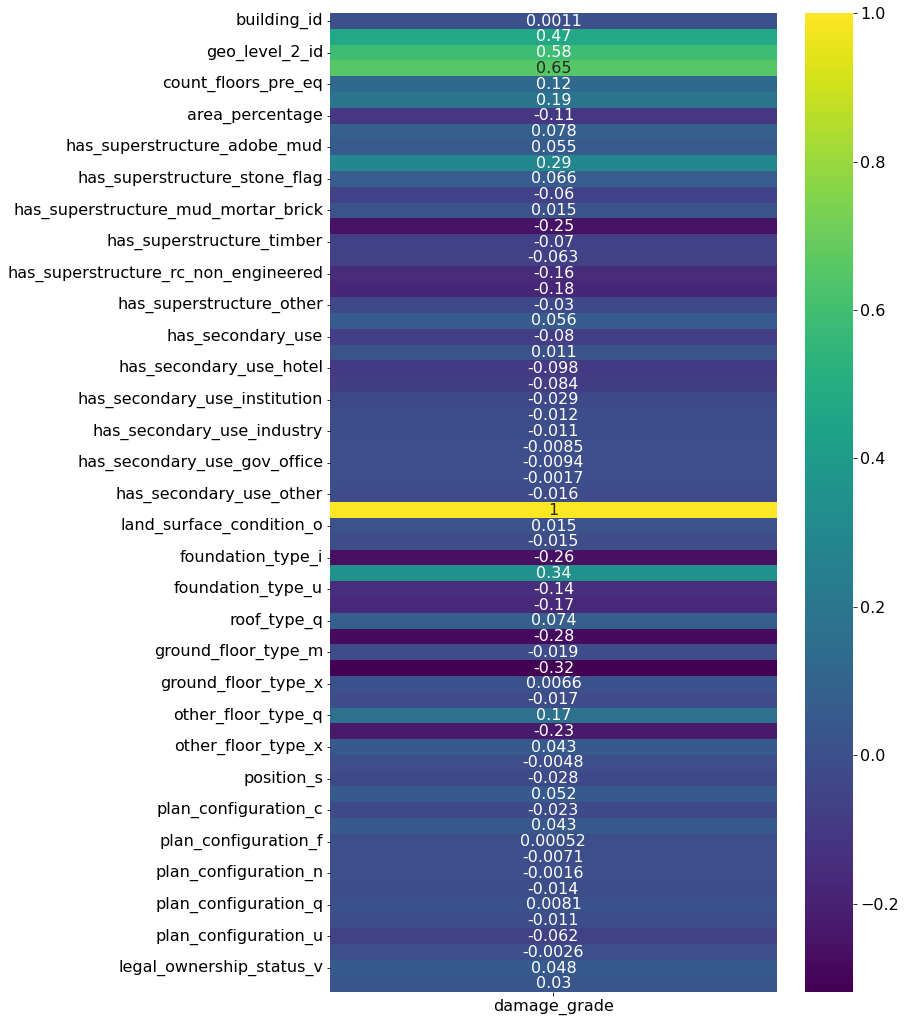

In [24]:
cor= data.corr()["damage_grade"]
plt.figure(figsize=(10,18))
cor=pd.DataFrame(cor)
plt.rcParams.update({'font.size': 16})
sns.heatmap(cor,annot=True,cmap="viridis")


The above plot consists of the correlation of each feature with the target variable. There are no highly correlated features. 

In [25]:
#Droppping the building_id column since it is a unique value column and doesn't provide much information
data.drop("building_id", inplace=True, axis=1)

## Feature Scaling
Tree based models don't need scaling


# Model Creation


## Splitting the dataset

In [26]:
from sklearn.model_selection import train_test_split

X= data.drop("damage_grade", axis=1)
y = data.damage_grade

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

## Model

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

model_1=GradientBoostingClassifier() ## object creation
model_1.fit(X_train,y_train) ## fitting the data
y_pred=model_1.predict(X_test)#predicting 


In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 3292,  2998,    57],
       [ 1423, 31619,  3952],
       [  101,  7956, 13753]], dtype=int64)

We will take f1 score as our primary evaluation metric since both recall and precision is important in this use case. Since this is a multiclass classification problem we will use "micro" averaged f1 score which is the preferred metric when classes are imbalanced. 

In [44]:
from sklearn.metrics import recall_score, precision_score,f1_score
print(f"The model's f1 score is {round(f1_score(y_test, y_pred,average='micro'),4)}")

The model's f1 score is 0.7463


In [45]:
print(f"The model's accuracy score is {round(accuracy_score(y_test, y_pred),4)}")

The model's accuracy score is 0.7463


In [37]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           1       0.68      0.52      0.59      6347
           2       0.74      0.85      0.79     36994
           3       0.77      0.63      0.70     21810

    accuracy                           0.75     65151
   macro avg       0.73      0.67      0.69     65151
weighted avg       0.75      0.75      0.74     65151



### The model's accuracy and f1 score is 0.75. 
The model performs best for class 2 followed by 3 and then 1. This difference in performance for each class can be explained by the disparity in number of observations in each class. 

## Feature Importance

We willl conduct a feature importance test to see which features have a greater impact ain predicting our target variable.

Text(0, 0.5, 'Features')

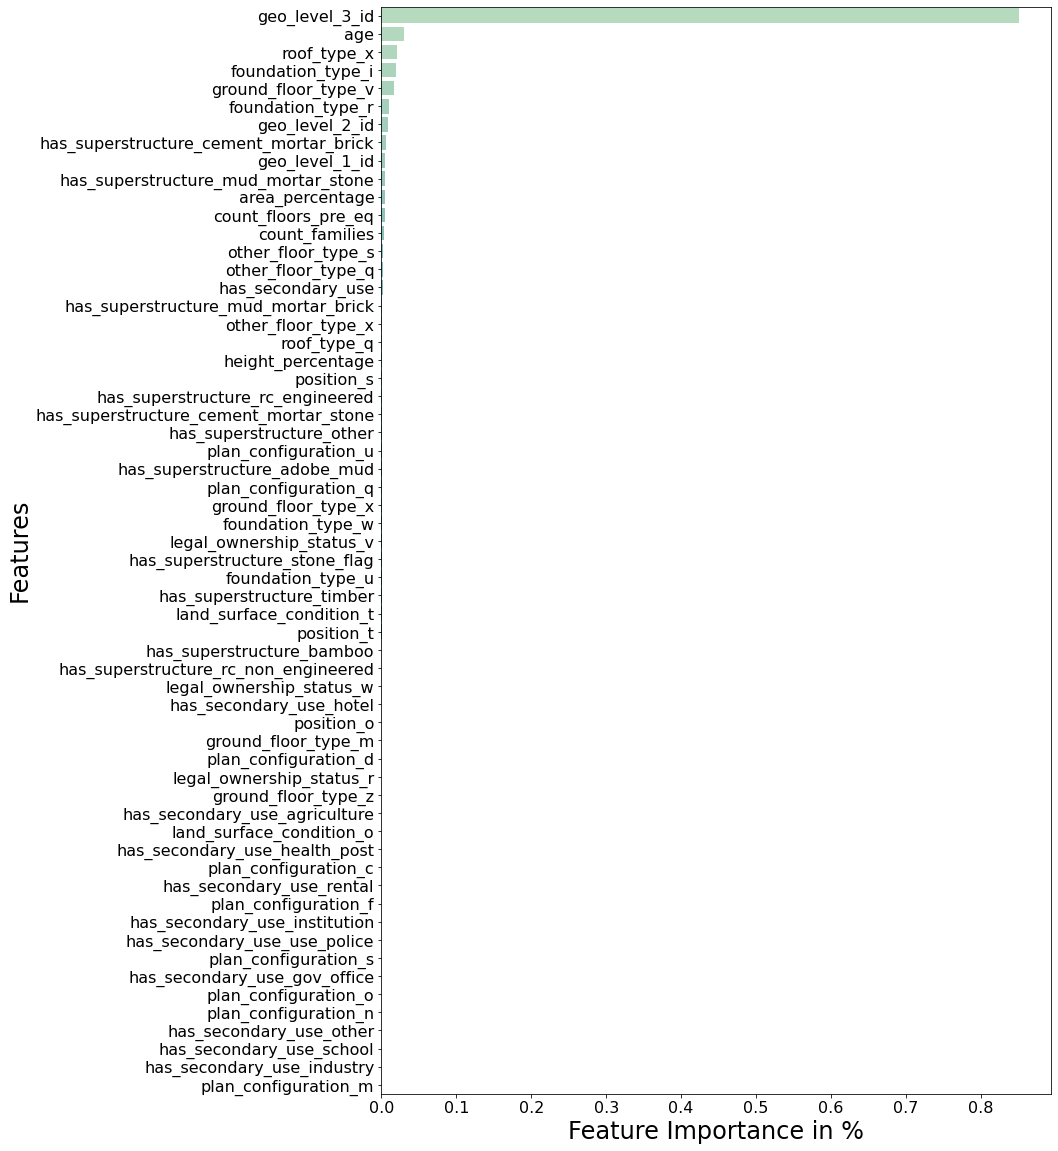

In [38]:
fimportance = model_1.feature_importances_
fimportance_df = pd.DataFrame() #creating feature importance dataframe
fimportance_df.loc[:, "f_imp"] = fimportance
fimportance_df.loc[:, "col"] = X.columns
fimportance_df.sort_values(by="f_imp", ascending=False, inplace=True) #Rearranging values in descending order
fig, ax = plt.subplots(1, 1, figsize=(12, 20))
ax = sns.barplot(x="f_imp", y="col",
                data=fimportance_df,
                palette="GnBu_d")
ax.tick_params(axis="both", which="major", labelsize=16)
ax.set_xlabel("Feature Importance in %", fontsize=24)
ax.set_ylabel("Features", fontsize=24)

It is evident that the geo level id 3 feature has the highest feature importance which is understandable since the location of the building (whether close to the earthquake's epicenter or far) would play a crucial role in predicting the level of damage. 

From the above plot we can see that many binary features have little to no impact in predicting our target variable. In order to reduce the number of dimensions and improve model performance we will drop binary feature from the dataset that have a feature importance score of less than 0.01%. 

In [39]:
low_fimp_features = list(fimportance_df[fimportance_df.f_imp<=0.01].col)
drop_features= [ feature for feature in low_fimp_features if feature in binary_features]


#Dropping binary features with very low feature importance i.e <=0.01
data.drop(drop_features,axis=1, inplace=True)



Creating a second model where low importance binary features have been dropped to see if this improves model performance

In [40]:
X= data.drop("damage_grade", axis=1)
y = data.damage_grade

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)



model_2 = GradientBoostingClassifier()
model_2.fit(X_train,y_train)
y_pred = model_2.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           1       0.68      0.52      0.59      6347
           2       0.74      0.86      0.79     36994
           3       0.77      0.63      0.69     21810

    accuracy                           0.75     65151
   macro avg       0.73      0.67      0.69     65151
weighted avg       0.75      0.75      0.74     65151



In [48]:
print(f"The model's f1 score is {round(f1_score(y_test, y_pred,average='micro'),4)}")

The model's f1 score is 0.7463


### We can see that dropping the binary features does not affect the model's performance at all. 

## Cross Validation

In [43]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(model_1, X, y, scoring="f1_micro", cv=cv, n_jobs=-1)
print("Model"," mean cross val score=", scores.mean(), "std=", scores.std())

Model  mean cross val score= 0.7473685846543132 std= 0.0011123128350657575


### The cross validation score for XGBOOST is 0.75 with a std of 0.001